get dataset and order data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import data_process
from sklearn.model_selection import train_test_split


x, y = data_process.process_data('dataset.csv', "OTHER")

import SVC

In [2]:
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

split data in train and test etc

In [3]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

fit model and train and compare accuracy


In [4]:

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [5]:
%%time
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

Wall time: 105 ms


In [6]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print('Accuracy Linear Kernel: ' , accuracy_lin)
print('Accuracy Polynomial Kernel: ', accuracy_poly)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf)
print('Accuracy Sigmoid Kernel: ', accuracy_sig)

Accuracy Linear Kernel:  0.9166666666666666
Accuracy Polynomial Kernel:  0.7395833333333334
Accuracy Radial Basis Kernel:  0.4375
Accuracy Sigmoid Kernel:  0.6770833333333334


do the same for dataset2.csv

In [7]:
x2, y2 = data_process.process_data('dataset2.csv', "OTHER")

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [9]:

linear2 = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
rbf2 = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
poly2 = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
sig2 = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train2, y_train2)

In [10]:
%%time
linear_pred2 = linear2.predict(X_test2)
poly_pred2 = poly2.predict(X_test2)
rbf_pred2 = rbf2.predict(X_test2)
sig_pred2 = sig2.predict(X_test2)

Wall time: 102 ms


In [11]:
accuracy_lin2 = linear2.score(X_test2, y_test2)
accuracy_poly2 = poly2.score(X_test2, y_test2)
accuracy_rbf2 = rbf2.score(X_test2, y_test2)
accuracy_sig2 = sig2.score(X_test2, y_test2)

print('Accuracy Linear Kernel: ' , accuracy_lin2)
print('Accuracy Polynomial Kernel: ', accuracy_poly2)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf2)
print('Accuracy Sigmoid Kernel: ', accuracy_sig2)

Accuracy Linear Kernel:  0.9895833333333334
Accuracy Polynomial Kernel:  0.8229166666666666
Accuracy Radial Basis Kernel:  0.4895833333333333
Accuracy Sigmoid Kernel:  0.6770833333333334


In [12]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns

y_test_true = y_test
y_test_true2 = y_test2
#
# y_pred = list()
# y_pred2 = list()
# for a in X_test:
#     y_pred.append(linear.predict(a))
#
# for a in X_test2:
#       y_pred2.append(linear2.predict(a))


In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

labels = ['Linear', 'Polynomial', 'Radial Basis', 'Sigmoid']
models = [linear, poly, rbf, sig]


y_pred = list()
for label, model in zip(labels, models):
    y_pred.append(pd.Series(enc.fit_transform(model.predict(X_test)), name=label))
y_pred = pd.concat(y_pred, axis=1)
y_test = enc.fit_transform(y_test)

metrics = list()
cm = dict()

for label in labels:

    precision, recall, fscore, _ = score(y_test, y_pred[label], average='weighted')

    accuracy = accuracy_score(y_test, y_pred[label])

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3]),
              label_binarize(y_pred[label], classes=[0,1,2,3]),
              average='weighted', multi_class='ovr')

    cm[label] = confusion_matrix(y_test, y_pred[label])

    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc }, name=label))

metrics = pd.concat(metrics, axis=1)

metrics


,Linear,Polynomial,Radial Basis,Sigmoid
precision,0.922597,0.773065,0.079102,0.668520
recall,0.916667,0.739583,0.281250,0.677083
fscore,0.917123,0.737802,0.123476,0.664678
accuracy,0.916667,0.739583,0.281250,0.677083
auc,0.949110,0.825186,0.500000,0.788876


In [14]:
labels2 = ['Linear', 'Polynomial', 'Radial Basis', 'Sigmoid']
models2 = [linear2, poly2, rbf2, sig2]



y_pred2 = list()

y_test2 = enc.fit_transform(y_test2)

for label, model in zip(labels2, models2):
    y_pred2.append(pd.Series(enc.fit_transform(model.predict(X_test2)), name=label))
y_pred2 = pd.concat(y_pred2, axis=1)

metrics2 = list()
cm2 = dict()

for label in labels2:

    precision, recall, fscore, _ = score(y_test2, y_pred2[label], average='weighted')

    accuracy = accuracy_score(y_test2, y_pred2[label])

    auc = roc_auc_score(label_binarize(y_test2, classes=[0,1,2]),
              label_binarize(y_pred2[label], classes=[0,1,2]),
              average='weighted', multi_class='ovr')

    cm2[label] = confusion_matrix(y_test2, y_pred2[label])

    metrics2.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc }, name=label))

metrics2 = pd.concat(metrics2, axis=1)

metrics2



,Linear,Polynomial,Radial Basis,Sigmoid
precision,0.990162,0.871441,0.245124,0.719151
recall,0.989583,0.822917,0.145833,0.677083
fscore,0.989506,0.813850,0.066496,0.681670
accuracy,0.989583,0.822917,0.145833,0.677083
auc,0.993671,0.901996,0.514467,0.817616


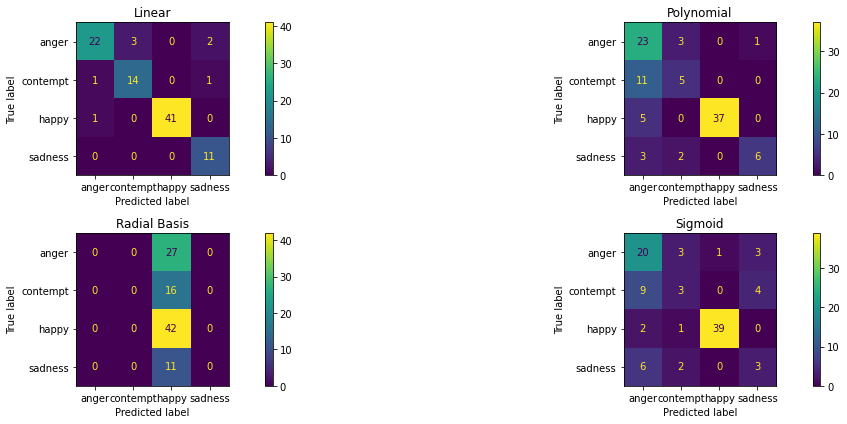

In [15]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(18, 6)

for ax,label,model in zip(axList, labels, models):
    plot_confusion_matrix(model, X_test, y_test_true, ax=ax)
    ax.set(title=label)

plt.tight_layout()

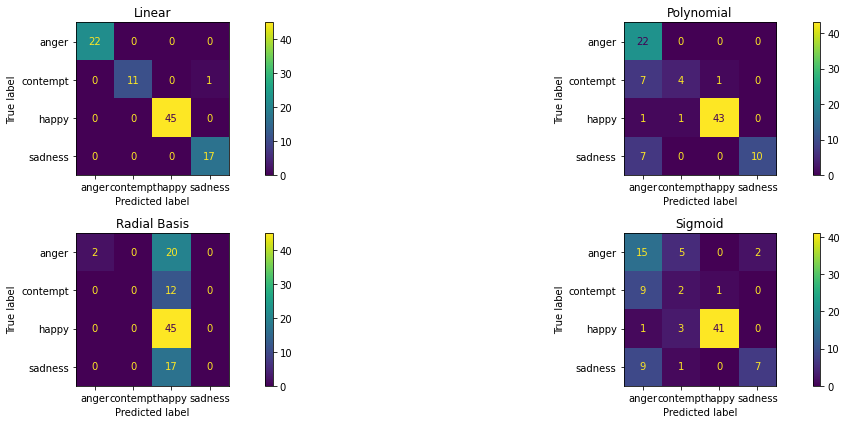

In [16]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(18, 6)

for ax,label,model in zip(axList, labels, models2):
    plot_confusion_matrix(model, X_test2, y_test_true2, ax=ax)
    ax.set(title=label)


plt.tight_layout()